## Гипотезы
- увеличилась рождаемость
- рождаемость мальчиков стала превышать рождаемость девочек
- мальчиков чаще называют гендерно-нейтральными именами, чем девочек

In [2]:
import csv
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter

In [ ]:
import seaborn as sns
import matplotlib as mpl

In [3]:
data_bab = pd.read_csv('babynames.csv', delimiter=',')
data_bab = pd.DataFrame(data_bab)
data_bab.head()

,year,sex,name,n,prop
0,1880,F,Mary,7065,0.072384
1,1880,F,Anna,2604,0.026679
2,1880,F,Emma,2003,0.020521
3,1880,F,Elizabeth,1939,0.019866
4,1880,F,Minnie,1746,0.017888


In [4]:
data_bab

,year,sex,name,n,prop
0,1880,F,Mary,7065,0.072384
1,1880,F,Anna,2604,0.026679
2,1880,F,Emma,2003,0.020521
3,1880,F,Elizabeth,1939,0.019866
4,1880,F,Minnie,1746,0.017888
...,...,...,...,...,...
1924660,2017,M,Zykai,5,0.000003
1924661,2017,M,Zykeem,5,0.000003
1924662,2017,M,Zylin,5,0.000003
1924663,2017,M,Zylis,5,0.000003


In [28]:
df_1 = data_bab.groupby(['year','sex'])['n', 'prop'].first()
df_1

C:\Users\espia\AppData\Local\Temp/ipykernel_12712/3058150553.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_1 = data_bab.groupby(['year','sex'])['n', 'prop'].first()


n      prop
year sex                 
1880 F     7065  0.072384
     M     9655  0.081546
1881 F     6919  0.069991
     M     8769  0.080983
1882 F     8148  0.070427
...         ...       ...
2015 M    19613  0.009622
2016 F    19471  0.010097
     M    19082  0.009457
2017 F    19738  0.010528
     M    18728  0.009539

[276 rows x 2 columns]

In [30]:
dct = df_1.to_dict('dict')

---

## 1880-1925
- uni_names (unisex names for 1880-1925 period)
- br_f1 (female birth rate)
- br_uni_f1 (girls with unisex names)
- br_m1 (male birth rate)
- br_uni_m1 (boys with unisex names)

In [45]:
dct_n1 = data_bab.loc[data_bab['year'] < 1926].groupby(['sex']).agg({'name': 'unique'}).to_dict('dict')

In [46]:
all_names = list(dct_n1['name']['F']) + list(dct_n1['name']['M'])
uni_names = []
for i in all_names:
    if all_names.count(i) > 1:
        uni_names.append(i)
print(len(uni_names))

4420


In [59]:
br_f1 = sum(birthf[:46]) # 1880-1925
br_uni_f1 = int(data_bab.loc[(data_bab['year'] < 1926) & (data_bab['sex'] == 'F') & (data_bab['name'].isin(uni_names))]['n'].agg(['sum']))

In [60]:
br_m1 = sum(birthm[:46]) # 1880-1925
br_uni_m1 = int(data_bab.loc[(data_bab['year'] < 1926) & (data_bab['sex'] == 'M') & (data_bab['name'].isin(uni_names))]['n'].agg(['sum']))

## 1926-1971
- uni_names2
- br_f2
- br_uni_f2
- br_m2
- br_uni_m2

In [61]:
dct_n2 = data_bab.loc[(data_bab['year'] > 1925) & (data_bab['year'] < 1972)].groupby(['sex']).agg({'name': 'unique'}).to_dict('dict')

all_names2 = list(dct_n2['name']['F']) + list(dct_n2['name']['M'])
uni_names2 = []
for i in all_names2:
    if all_names2.count(i) > 1:
        uni_names2.append(i)
print(len(uni_names2))

7274


In [63]:
br_f2 = sum(birthf[46:92]) # 1926-1971
br_uni_f2 = int(data_bab.loc[(data_bab['year'] > 1925) & (data_bab['year'] < 1972) & (data_bab['sex'] == 'F') & (data_bab['name'].isin(uni_names2))]['n'].agg(['sum']))

In [64]:
br_m2 = sum(birthm[46:92]) # 1926-1971
br_uni_m2 = int(data_bab.loc[(data_bab['year'] > 1925) & (data_bab['year'] < 1972) & (data_bab['sex'] == 'M') & (data_bab['name'].isin(uni_names2))]['n'].agg(['sum']))

## 1972-2017
- uni_names3
- br_f23
- br_uni_f3
- br_m3
- br_uni_m3

In [65]:
dct_n3 = data_bab.loc[data_bab['year'] > 1971].groupby(['sex']).agg({'name': 'unique'}).to_dict('dict')

all_names3 = list(dct_n3['name']['F']) + list(dct_n3['name']['M'])
uni_names3 = []
for i in all_names3:
    if all_names3.count(i) > 1:
        uni_names3.append(i)
print(len(uni_names3))

17762


In [67]:
br_f3 = sum(birthf[92:]) # 1972-2017
br_uni_f3 = int(data_bab.loc[(data_bab['year'] > 1971) & (data_bab['sex'] == 'F') & (data_bab['name'].isin(uni_names3))]['n'].agg(['sum']))

In [68]:
br_m3 = sum(birthm[92:]) # 1972-2017
br_uni_m3 = int(data_bab.loc[(data_bab['year'] > 1971) & (data_bab['sex'] == 'M') & (data_bab['name'].isin(uni_names3))]['n'].agg(['sum']))

- Соотношение числа девочек / мальчиков с гендерно-нейтральными именами и числа всех рожденных девочек / мальчиков за конкретный период

In [70]:
f1 = br_uni_f1 / br_f1
m1 = br_uni_m1 / br_m1
f2 = br_uni_f2 / br_f2
m2 = br_uni_m2 / br_m2
f3 = br_uni_f3 / br_f3
m3 = br_uni_m3 / br_m3

---

## мальчиков чаще называют гендерно-нейтральными именами, чем девочек

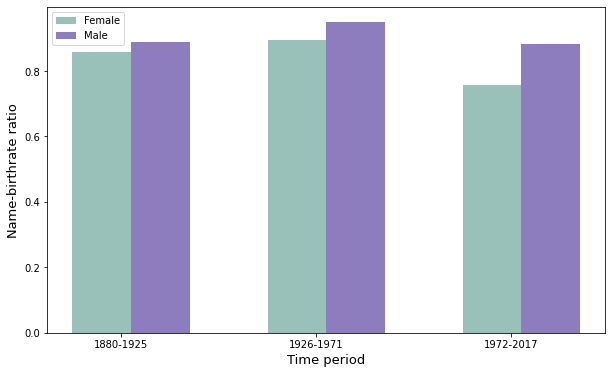

In [145]:
timeline = ['1880-1925', '1926-1971', '1972-2017'] # промежуток в 46 лет
female = [f1, f2, f3]
male = [m1, m2, m3]

plt.figure(figsize=(10, 6))
x_axis = np.arange(len(timeline))
plt.bar(x_axis -0.1, female, width=0.3, label = 'Female', color='#99c1b9')
plt.bar(x_axis +0.2, male, width=0.3, label = 'Male', color='#8e7dbe')
plt.xticks(x_axis, timeline)
plt.ylabel("Name-birthrate ratio", fontsize=13)
plt.xlabel("Time period", fontsize=13)
plt.legend()
#plt.savefig('uninames.png')
plt.show()

---

In [31]:
years = []
birthrate = []
birthf = []
birthm = []
for i in range(1880, 2018):
    fem = dct['n'][(i, 'F')] / dct['prop'][(i, 'F')]
    mal = dct['n'][(i, 'M')] / dct['prop'][(i, 'M')]
    total = fem + mal
    birthrate.append(round(total))
    birthf.append(round(fem))
    birthm.append(round(mal))
    if i not in years:
        years.append(i)

## рождаемость увеличилась

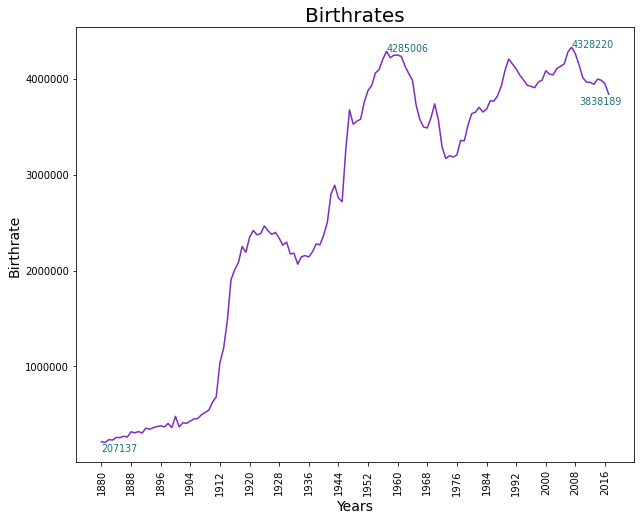

In [147]:
plt.figure(figsize=(10, 8))
plt.plot(years, birthrate, color='#7b2cbf')
ax = plt.gca()
ax.yaxis.get_major_formatter().set_scientific(False)
plt.xticks(np.arange(1880, 2017, 8), rotation=90)
plt.annotate(str(4328220), xy=(2007, 4328220+1), fontsize=9.5, color='#197278')
plt.annotate(str(4285006), xy=(1957, 4285006+1), fontsize=9.5, color='#197278')
plt.annotate(str(207137), xy=(1880, 120137), fontsize=9.5, color='#197278')
plt.annotate(str(3838189), xy=(2009, 3738189), fontsize=9.5, color='#197278')
plt.ylabel("Birthrate", fontsize=14)
plt.xlabel("Years", fontsize=14)
plt.title("Birthrates", fontsize=20)
#plt.savefig('birthrates.png')
plt.show()

## рождаемость мальчиков стала превышать рождаемость девочек

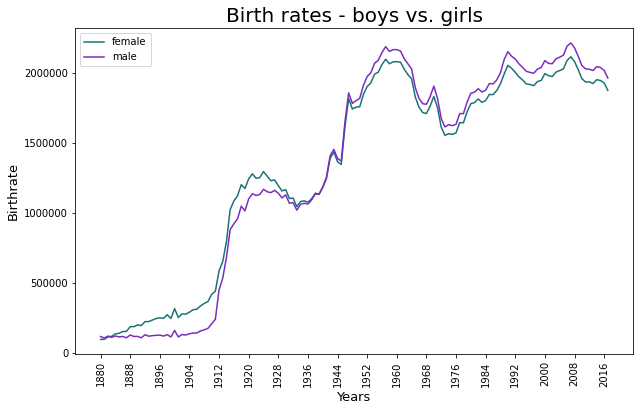

In [149]:
plt.figure(figsize=(10, 6))
plt.plot(years, birthf, color='#197278', label='female')
plt.plot(years, birthm, color='#7b2cbf', label='male')
ax = plt.gca()
ax.yaxis.get_major_formatter().set_scientific(False)
plt.xticks(np.arange(1880, 2017, 8), rotation=90)
plt.legend()
plt.ylabel("Birthrate", fontsize=13)
plt.xlabel("Years", fontsize=13)
plt.title("Birth rates - boys vs. girls", fontsize=20)
#plt.savefig('birthrates_fm.png')
plt.show()

---